2. Data Handling:
 - Use Python to process and clean the uploaded data.
 - Store the processed data on AWS S3.
 - Implement data visualization using MatPlotLib and Seaborn to display insights on the dashboard.

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("health_data.csv")

In [37]:
df.head()

,Date,Heart Rate,Blood Pressure,Stress Level,Weight,Time
0,2023-09-05,90,110,30,65.0,15:06:00
1,2023-09-05,89,120,32,64.0,15:08:00
2,2023-09-05,65,130,40,67.0,16:14:00
3,2023-09-05,65,130,40,67.0,16:14:00
4,2023-09-05,65,130,40,67.0,16:14:00


In [38]:
df.isnull()

,Date,Heart Rate,Blood Pressure,Stress Level,Weight,Time
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
5,False,False,False,False,False,False
6,False,False,False,False,False,False
7,False,False,False,False,False,False
8,False,False,False,False,False,False
9,False,False,False,False,False,False


In [39]:
df.isnull().sum()

Date              0
Heart Rate        0
Blood Pressure    0
Stress Level      0
Weight            0
Time              0
dtype: int64

In [40]:
df.columns

Index(['Date', 'Heart Rate', 'Blood Pressure', 'Stress Level', 'Weight',
       'Time'],
      dtype='object')

In [41]:
df.describe

<bound method NDFrame.describe of           Date  Heart Rate  Blood Pressure  Stress Level  Weight      Time
0   2023-09-05          90             110            30    65.0  15:06:00
1   2023-09-05          89             120            32    64.0  15:08:00
2   2023-09-05          65             130            40    67.0  16:14:00
3   2023-09-05          65             130            40    67.0  16:14:00
4   2023-09-05          65             130            40    67.0  16:14:00
5   2023-09-06          98             125            25    67.0  16:16:00
6   2023-09-06          98             125            25    67.0  16:16:00
7   2023-09-06          98             125            25    67.0  16:16:00
8   2023-09-07          65             100            65    65.0  09:26:00
9   2023-09-13          78             125            30    65.0  07:50:00
10  2023-09-13          78             125            30    65.0  07:50:00
11  2023-09-06          85             110            25    67.0  

# Data Visualization

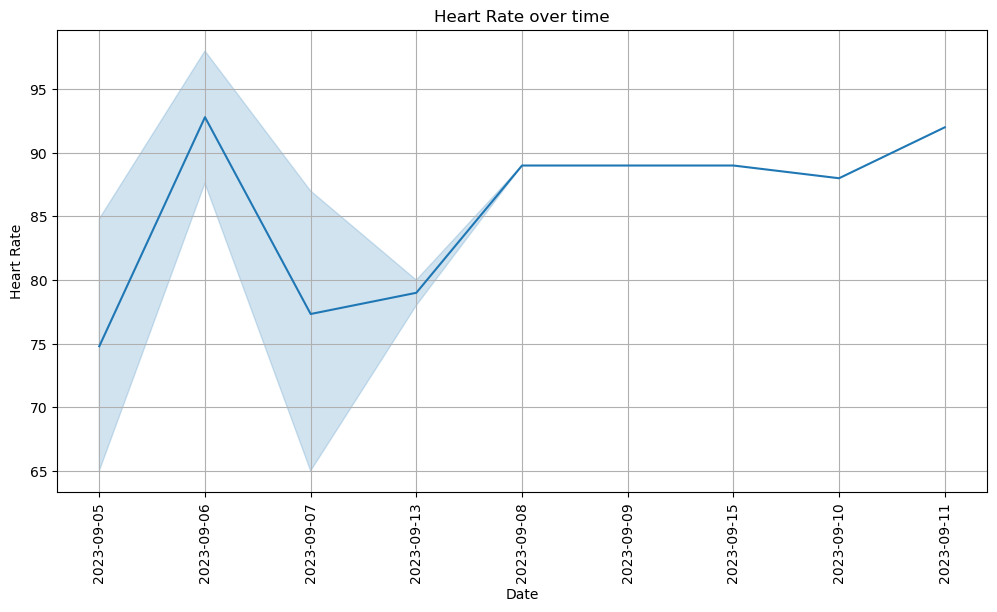

In [44]:
# Heartrate over time
plt.figure(figsize=(12,6))
sns.lineplot(data=df,x='Date', y='Heart Rate')
plt.title("Heart Rate over time")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

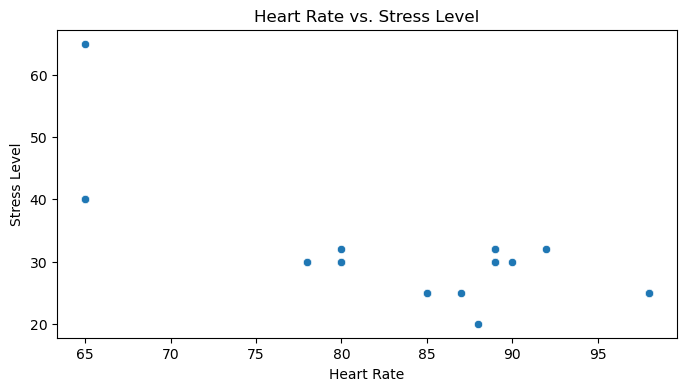

In [45]:
# comparision of stress level and heartrate
plt.figure(figsize=(8, 4))
sns.scatterplot(x='Heart Rate', y='Stress Level', data=df)
plt.title('Heart Rate vs. Stress Level')
plt.show()

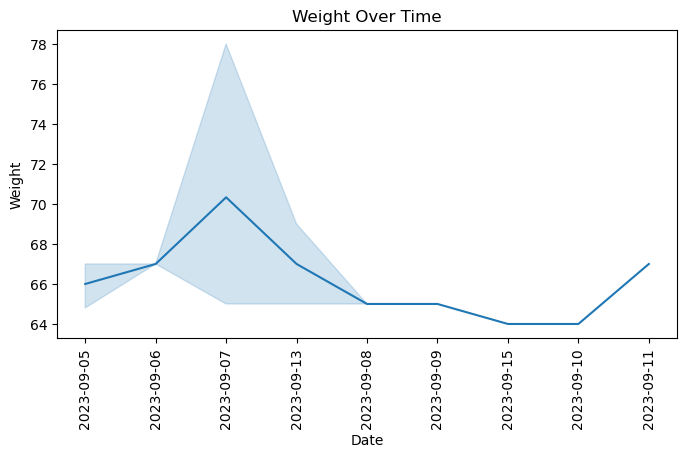

In [48]:
# Weight over time
plt.figure(figsize=(8, 4))
sns.lineplot(x='Date', y='Weight', data=df)
plt.title('Weight Over Time')
plt.xticks(rotation=90)
plt.show()

In [47]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("health_data.csv")

# Define your threshold for high heart rate (adjust as needed)
threshold_heart_rate = 80  # Adjust this threshold based on your criteria

# Create a binary health risk column based on heart rate
df['Health Risk'] = (df['Heart Rate'] > threshold_heart_rate).astype(int)

# Define your features (X) and target variable (y)
X = df[['Blood Pressure', 'Stress Level', 'Weight']].values
y = df['Health Risk'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (scaling)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define your new data variables
new_heart_rate = 85
new_blood_pressure = '120'
new_stress_level = 3.5
new_weight = 68

# Extract numerical values from 'Blood Pressure'
new_blood_pressure_values = [float(val) for val in new_blood_pressure.split('/')]

# Create an array with the new data
new_data = np.array([[new_blood_pressure_values[0], new_stress_level, new_weight]])

# Standardize the new data
new_data = scaler.transform(new_data)

# Make predictions
predicted_risk = model.predict(new_data)
print(f'Predicted health risk: {predicted_risk[0][0]:.4f}')


1/1 [==============================] - 0s 21ms/step
Predicted health risk: 0.5716
